# Testing the trained Log - Log 14th Degree Poly model

In [7]:
#IMPORTS
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import pylab as py
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
print(os.listdir())

['.statistical_irradience_modeling.ipynb.icloud', 'data_munger.py', 'Testing_Data', '.DS_Store', '.Data_Viz 2.ipynb.icloud', 'Log_Log_Polynomial_clf.joblib', 'Raw_Data', 'README.md', 'scratch', 'psm_VA_Charlottesville2018cloud_output.csv', '.ipynb_checkpoints', '.git', 'easySolarTesting.ipynb']


In [8]:
#Time for Polynomial Fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error
#Okay none of these are super good. Lets do a boxcox transformation
from sklearn.preprocessing import power_transform

In [9]:
_Curr_Dir = os.getcwd()
_Testing_Data_Dir = os.path.join(_Curr_Dir, 'Testing_Data')
print(_Curr_Dir)
print(_Testing_Data_Dir)
# data_path = os.path.join(curr_dir, 'Data_Files', 'Testing_Data')
# print(os.listdir(data_path))

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor
/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data


In [10]:
def logify_df(df):
    df['DHI_log'] = np.log(df['DHI'])
    df['GHI_log'] = np.log(df['GHI'])
    df['cloud_cover_log'] = np.log(df['Cloud Cover'])
    return df

In [11]:
def make_df_nonzero(df):
    df_no_zero = df.loc[df['DHI']!= 0 ]
    assert len(df_no_zero['DHI'])==len(df_no_zero['GHI']), "Some DHI 0s where GHI is not 0"
    print(df_no_zero)
    return df_no_zero 

In [12]:
def meta_visualization(data, x='GHI', y='DHI', z='Cloud Cover'):
    sns.lmplot(x, y, data=data, hue=z, fit_reg=False)
    plt.show()
    return

In [35]:
def featureHistograms(df, features=['GHI','DHI','Cloud Cover'],):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(ncols=len(features))
    for i in range(len(features)):
        sns.distplot(df[features[i]], ax=axs[i])

In [54]:
def runPolyModel(X, Y, model, degrees=14):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    result = show_model_metrics(_X_poly, Y, model)
    return result[0], result[1]
    

In [70]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        print("median absolute error is ", median_absolute_error(Y, preds))
        print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
        return preds, resids

In [56]:
def show_model_metrics_logBackTrans(X, Y, model):
    preds = model.predict(X)
    preds = np.exp(preds)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    print("mean squared log error is ", mean_squared_log_error(Y, preds))
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [57]:
def three_dee_viz(x,y,z,preds=None):
    #3d viz
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.set(xlabel='arg1', ylabel='arg2', zlabel='arg3')
    ax.scatter(x,y,z)
    if preds:
        ax.scatter(x, y,preds)
    plt.show()

In [101]:
#Load the model

In [112]:
from joblib import dump, load
clf = load("Log_Log_Polynomial_clf.joblib")

print(clf)
print(type(clf))
print(clf.intercept_)
print(clf.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.04021773455490418
[ 0.00000000e+00  1.13259700e+00  9.01811037e-02 -2.26034252e-01
 -1.25427729e-01  1.36071336e-01  1.00114890e-01  7.37543363e-02
  1.91764645e-02  8.83968249e-02 -1.65783839e-02 -6.68518417e-03
  1.43036108e-03 -9.82344571e-04  1.49701305e-02  8.01225141e-04
 -2.00415995e-04 -7.41238232e-04 -4.57681971e-04 -3.13319865e-04
  7.17347135e-04]


In [114]:
#Load data
#2017 psm data
# Lat/lon: 43.85, -99.5

df1_psm_2017= pd.read_csv(os.path.join(_Testing_Data_Dir, 'psm_testing_data2017.csv'))
#Remove Zeros
df1_psm_2017 = make_df_nonzero(df1_psm_2017)
df1_psm_2017['Cloud Cover'] = df1_psm_2017['Cloud Cover'].apply(lambda x: x+0.00001)
#Logify
df1_psm_2017 = logify_df(df1_psm_2017)
print(df1_psm_2017['cloud_cover_log'])

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
14    2017      1    1    14      30           -9            14           238   
15    2017      1    1    15      30           -7            47           614   
16    2017      1    1    16      30           -5            66           753   
17    2017      1    1    17      30           -3            78           809   
18    2017      1    1    18      30           -1            86           815   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8754  2017     12   31    18      30          -18            73           926   
8755  2017     12   31    19      30          -18            70           923   
8756  2017     12   31    20      30          -18            62           884   
8757  2017     12   31    21      30          -18            49           786   
8758  2017     12   31    22      30          -20            27           541   

      Clearsky GHI  Cloud T

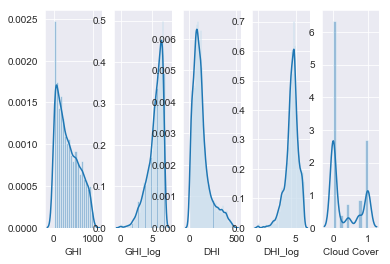

In [115]:
featureHistograms(df1_psm_2017, ['GHI', 'GHI_log', 'DHI', 'DHI_log', 'Cloud Cover'])

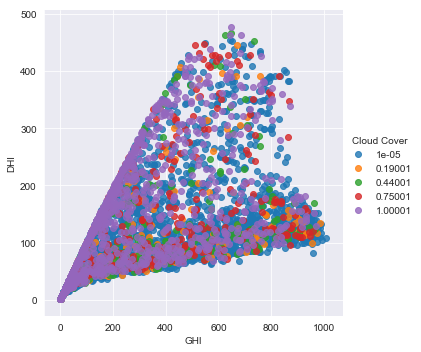

In [116]:
#Check the data out
meta_visualization(df1_psm_2017)

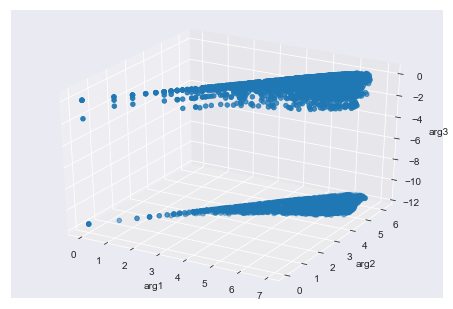

In [117]:
#And now with logs
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'])

In [118]:
def runPolyModel(X, Y, model, degrees=14):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    result = show_model_metrics(_X_poly, Y, model)
    return result[0], result[1]
    

In [122]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        pass
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [123]:
for i in range(len(df1_psm_2017['Cloud Cover'].values)):
    print(df1_psm_2017['Cloud Cover'].values[i])
    print(df1_psm_2017['cloud_cover_log'].values[i])
    print(df1_psm_2017['GHI'].values[i])
    print(df1_psm_2017['GHI_log'].values[i])


1e-05
-11.512925464970229
22
3.091042453358316
1e-05
-11.512925464970229
154
5.0369526024136295
1e-05
-11.512925464970229
283
5.645446897643238
1e-05
-11.512925464970229
83
4.418840607796598
1e-05
-11.512925464970229
185
5.220355825078324
1e-05
-11.512925464970229
72
4.276666119016055
1e-05
-11.512925464970229
59
4.07753744390572
1e-05
-11.512925464970229
37
3.6109179126442243
1e-05
-11.512925464970229
12
2.4849066497880004
1.00001
9.999950000398841e-06
8
2.0794415416798357
1.00001
9.999950000398841e-06
66
4.189654742026425
0.75001
-0.28766873920733577
125
4.8283137373023015
1.00001
9.999950000398841e-06
118
4.770684624465665
0.19001
-1.6606785766276964
131
4.875197323201151
0.75001
-0.28766873920733577
14
2.6390573296152584
0.44001
-0.8209578250553634
11
2.3978952727983707
0.75001
-0.28766873920733577
7
1.9459101490553132
0.44001
-0.8209578250553634
2
0.6931471805599453
1e-05
-11.512925464970229
22
3.091042453358316
0.75001
-0.28766873920733577
159
5.0689042022202315
0.44001
-0.820957

6
1.791759469228055
0.75001
-0.28766873920733577
14
2.6390573296152584
1.00001
9.999950000398841e-06
59
4.07753744390572
1.00001
9.999950000398841e-06
334
5.811140992976701
0.75001
-0.28766873920733577
607
6.408528791059498
1.00001
9.999950000398841e-06
607
6.408528791059498
0.75001
-0.28766873920733577
545
6.300785794663244
1e-05
-11.512925464970229
429
6.061456918928017
1e-05
-11.512925464970229
271
5.602118820879701
0.44001
-0.8209578250553634
96
4.564348191467836
1e-05
-11.512925464970229
140
4.941642422609304
1e-05
-11.512925464970229
312
5.7430031878094825
1e-05
-11.512925464970229
359
5.883322388488279
1e-05
-11.512925464970229
564
6.335054251498059
1e-05
-11.512925464970229
616
6.423246963533519
1e-05
-11.512925464970229
609
6.411818267709897
1e-05
-11.512925464970229
544
6.298949246855942
1e-05
-11.512925464970229
425
6.052089168924417
1e-05
-11.512925464970229
266
5.583496308781699
1e-05
-11.512925464970229
93
4.532599493153256
1e-05
-11.512925464970229
149
5.003946305945459


809
6.695798917058491
1.00001
9.999950000398841e-06
731
6.594413459749778
1.00001
9.999950000398841e-06
599
6.395261598115449
1.00001
9.999950000398841e-06
424
6.049733455231958
1.00001
9.999950000398841e-06
226
5.420534999272286
1.00001
9.999950000398841e-06
44
3.784189633918261
1.00001
9.999950000398841e-06
26
3.258096538021482
1.00001
9.999950000398841e-06
65
4.174387269895637
1.00001
9.999950000398841e-06
181
5.198497031265826
1.00001
9.999950000398841e-06
231
5.442417710521793
1.00001
9.999950000398841e-06
154
5.0369526024136295
1.00001
9.999950000398841e-06
332
5.805134968916488
1.00001
9.999950000398841e-06
112
4.718498871295094
1.00001
9.999950000398841e-06
498
6.210600077024653
1.00001
9.999950000398841e-06
193
5.262690188904886
1.00001
9.999950000398841e-06
330
5.799092654460526
1.00001
9.999950000398841e-06
176
5.170483995038151
1.00001
9.999950000398841e-06
35
3.5553480614894135
1.00001
9.999950000398841e-06
73
4.290459441148391
1.00001
9.999950000398841e-06
177
5.176149732

-11.512925464970229
305
5.720311776607412
1e-05
-11.512925464970229
119
4.77912349311153
1e-05
-11.512925464970229
73
4.290459441148391
1e-05
-11.512925464970229
221
5.3981627015177525
1e-05
-11.512925464970229
302
5.71042701737487
1e-05
-11.512925464970229
497
6.208590026096629
1e-05
-11.512925464970229
399
5.988961416889864
1e-05
-11.512925464970229
574
6.352629396319567
1e-05
-11.512925464970229
411
6.018593214496234
1e-05
-11.512925464970229
606
6.406879986069314
1e-05
-11.512925464970229
746
6.61472560020376
1e-05
-11.512925464970229
653
6.481577129276431
1e-05
-11.512925464970229
503
6.220590170099739
0.44001
-0.8209578250553634
314
5.749392985908253
0.75001
-0.28766873920733577
125
4.8283137373023015
0.19001
-1.6606785766276964
15
2.70805020110221
0.75001
-0.28766873920733577
45
3.8066624897703196
1.00001
9.999950000398841e-06
91
4.51085950651685
1.00001
9.999950000398841e-06
157
5.056245805348308
1.00001
9.999950000398841e-06
180
5.19295685089021
1.00001
9.999950000398841e-06
1

9.999950000398841e-06
248
5.5134287461649825
1.00001
9.999950000398841e-06
147
4.990432586778736
1.00001
9.999950000398841e-06
143
4.962844630259907
1.00001
9.999950000398841e-06
194
5.267858159063328
1.00001
9.999950000398841e-06
101
4.61512051684126
1.00001
9.999950000398841e-06
59
4.07753744390572
1.00001
9.999950000398841e-06
30
3.4011973816621555
1.00001
9.999950000398841e-06
6
1.791759469228055
1.00001
9.999950000398841e-06
28
3.332204510175204
1.00001
9.999950000398841e-06
181
5.198497031265826
1.00001
9.999950000398841e-06
372
5.918893854273146
1.00001
9.999950000398841e-06
561
6.329720905522696
1.00001
9.999950000398841e-06
728
6.590301048196686
0.75001
-0.28766873920733577
859
6.755768921984255
0.75001
-0.28766873920733577
944
6.8501261661455
1.00001
9.999950000398841e-06
963
6.870053411798126
0.75001
-0.28766873920733577
937
6.842683282238422
1e-05
-11.512925464970229
860
6.756932389247553
1e-05
-11.512925464970229
718
6.576469569048224
1e-05
-11.512925464970229
558
6.324358

1e-05
-11.512925464970229
986
6.893656354602635
1e-05
-11.512925464970229
964
6.871091294610546
1e-05
-11.512925464970229
890
6.7912214627261855
1e-05
-11.512925464970229
754
6.625392368007956
1e-05
-11.512925464970229
594
6.386879319362645
1e-05
-11.512925464970229
414
6.025865973825314
1e-05
-11.512925464970229
232
5.44673737166631
1e-05
-11.512925464970229
73
4.290459441148391
1e-05
-11.512925464970229
46
3.828641396489095
0.75001
-0.28766873920733577
199
5.293304824724492
1e-05
-11.512925464970229
382
5.945420608606575
1e-05
-11.512925464970229
563
6.333279628139691
1e-05
-11.512925464970229
632
6.448889394146858
0.44001
-0.8209578250553634
856
6.752270376141742
0.19001
-1.6606785766276964
943
6.849066282633458
1e-05
-11.512925464970229
972
6.879355804460439
1e-05
-11.512925464970229
952
6.858565034791365
1e-05
-11.512925464970229
879
6.778784897685177
1e-05
-11.512925464970229
761
6.634633357861686
1e-05
-11.512925464970229
504
6.222576268071369
1e-05
-11.512925464970229
294
5.683

1e-05
-11.512925464970229
925
6.829793737512425
1e-05
-11.512925464970229
814
6.70196036600254
1e-05
-11.512925464970229
733
6.597145701886651
1e-05
-11.512925464970229
738
6.6039438246004725
1e-05
-11.512925464970229
594
6.386879319362645
1e-05
-11.512925464970229
422
6.045005314036012
1e-05
-11.512925464970229
241
5.484796933490655
1e-05
-11.512925464970229
79
4.3694478524670215
1e-05
-11.512925464970229
26
3.258096538021482
1e-05
-11.512925464970229
166
5.111987788356544
1e-05
-11.512925464970229
287
5.659482215759621
1e-05
-11.512925464970229
251
5.5254529391317835
1e-05
-11.512925464970229
193
5.262690188904886
1e-05
-11.512925464970229
816
6.704414354964107
1e-05
-11.512925464970229
901
6.803505257608338
1e-05
-11.512925464970229
915
6.818924065275521
1e-05
-11.512925464970229
896
6.79794041297493
1e-05
-11.512925464970229
718
6.576469569048224
1e-05
-11.512925464970229
698
6.548219102762372
0.19001
-1.6606785766276964
522
6.257667587882639
0.19001
-1.6606785766276964
353
5.86646

5.6131281063880705
1e-05
-11.512925464970229
493
6.20050917404269
1e-05
-11.512925464970229
665
6.499787040655854
1e-05
-11.512925464970229
590
6.380122536899765
1e-05
-11.512925464970229
897
6.799055862058796
1e-05
-11.512925464970229
934
6.839476438228843
1e-05
-11.512925464970229
915
6.818924065275521
1e-05
-11.512925464970229
840
6.733401891837359
1e-05
-11.512925464970229
709
6.5638555265321274
1e-05
-11.512925464970229
448
6.104793232414985
1e-05
-11.512925464970229
277
5.6240175061873385
0.19001
-1.6606785766276964
180
5.19295685089021
0.75001
-0.28766873920733577
31
3.4339872044851463
0.19001
-1.6606785766276964
53
3.970291913552122
1e-05
-11.512925464970229
148
4.997212273764115
1e-05
-11.512925464970229
409
6.013715156042802
1e-05
-11.512925464970229
480
6.173786103901937
0.44001
-0.8209578250553634
494
6.202535517187923
1.00001
9.999950000398841e-06
630
6.4457198193855785
1.00001
9.999950000398841e-06
681
6.523562306149512
1.00001
9.999950000398841e-06
569
6.343880434126331


2.6390573296152584
0.19001
-1.6606785766276964
17
2.833213344056216
1.00001
9.999950000398841e-06
89
4.48863636973214
1.00001
9.999950000398841e-06
306
5.723585101952381
1.00001
9.999950000398841e-06
681
6.523562306149512
0.75001
-0.28766873920733577
739
6.6052979209482015
0.75001
-0.28766873920733577
712
6.568077911411976
1.00001
9.999950000398841e-06
632
6.448889394146858
1.00001
9.999950000398841e-06
468
6.148468295917647
0.75001
-0.28766873920733577
353
5.8664680569332965
1.00001
9.999950000398841e-06
170
5.135798437050262
1.00001
9.999950000398841e-06
42
3.7376696182833684
1e-05
-11.512925464970229
19
2.9444389791664403
1e-05
-11.512925464970229
162
5.087596335232384
1e-05
-11.512925464970229
334
5.811140992976701
0.44001
-0.8209578250553634
497
6.208590026096629
1e-05
-11.512925464970229
629
6.444131256700441
1e-05
-11.512925464970229
718
6.576469569048224
1e-05
-11.512925464970229
789
6.670766320845874
1e-05
-11.512925464970229
765
6.639875833826536
1e-05
-11.512925464970229
682

2.70805020110221
0.75001
-0.28766873920733577
40
3.6888794541139363
0.75001
-0.28766873920733577
26
3.258096538021482
0.75001
-0.28766873920733577
11
2.3978952727983707
0.44001
-0.8209578250553634
335
5.814130531825066
1e-05
-11.512925464970229
335
5.814130531825066
1e-05
-11.512925464970229
309
5.733341276897746
1e-05
-11.512925464970229
218
5.384495062789089
1e-05
-11.512925464970229
139
4.9344739331306915
0.75001
-0.28766873920733577
160
5.075173815233827
1.00001
9.999950000398841e-06
53
3.970291913552122
1.00001
9.999950000398841e-06
32
3.4657359027997265
1.00001
9.999950000398841e-06
89
4.48863636973214
0.75001
-0.28766873920733577
358
5.8805329864007
0.75001
-0.28766873920733577
430
6.063785208687608
1.00001
9.999950000398841e-06
682
6.525029657843462
1.00001
9.999950000398841e-06
708
6.56244409369372
1.00001
9.999950000398841e-06
676
6.516193076042964
1.00001
9.999950000398841e-06
464
6.139884552226255
1.00001
9.999950000398841e-06
447
6.102558594613569
1.00001
9.999950000398841

54
3.9889840465642745
1e-05
-11.512925464970229
119
4.77912349311153
1e-05
-11.512925464970229
265
5.579729825986222
1e-05
-11.512925464970229
381
5.942799375126701
1e-05
-11.512925464970229
451
6.111467339502679
1e-05
-11.512925464970229
478
6.169610732491456
1e-05
-11.512925464970229
442
6.091309882077698
1e-05
-11.512925464970229
275
5.616771097666572
1e-05
-11.512925464970229
174
5.159055299214529
0.44001
-0.8209578250553634
57
4.04305126783455
0.75001
-0.28766873920733577
116
4.7535901911063645
0.19001
-1.6606785766276964
265
5.579729825986222
1e-05
-11.512925464970229
386
5.955837369464831
1e-05
-11.512925464970229
461
6.133398042996649
1e-05
-11.512925464970229
484
6.182084906716632
1e-05
-11.512925464970229
449
6.1070228877422545
1e-05
-11.512925464970229
361
5.8888779583328805
1e-05
-11.512925464970229
226
5.420534999272286
1e-05
-11.512925464970229
78
4.356708826689592
1e-05
-11.512925464970229
103
4.634728988229636
1e-05
-11.512925464970229
239
5.476463551931511
1e-05
-11.51

-11.512925464970229
275
5.616771097666572
1e-05
-11.512925464970229
355
5.872117789475416
1e-05
-11.512925464970229
316
5.755742213586912
1e-05
-11.512925464970229
297
5.6937321388027
1e-05
-11.512925464970229
238
5.472270673671475
1e-05
-11.512925464970229
144
4.969813299576001
1e-05
-11.512925464970229
38
3.6375861597263857
1e-05
-11.512925464970229
29
3.367295829986474
1e-05
-11.512925464970229
159
5.0689042022202315
0.44001
-0.8209578250553634
281
5.638354669333745
0.44001
-0.8209578250553634
363
5.8944028342648505
1e-05
-11.512925464970229
325
5.783825182329737
0.44001
-0.8209578250553634
333
5.808142489980444
1.00001
9.999950000398841e-06
296
5.69035945432406
0.19001
-1.6606785766276964
180
5.19295685089021
1e-05
-11.512925464970229
48
3.871201010907891
1e-05
-11.512925464970229
21
3.044522437723423
1e-05
-11.512925464970229
126
4.836281906951478
1e-05
-11.512925464970229
229
5.43372200355424
0.75001
-0.28766873920733577
222
5.402677381872279
1e-05
-11.512925464970229
390
5.96614

In [124]:
#Lets make some predictions
X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
Y = df1_psm_2017['DHI_log'].values
runPolyModel(X, Y, clf, degrees=5)

rmse is  0.5712385865395415
r2 is  0.563262244945854
mean absolute error is  0.46556420368025725
mean squared log error is  0.010520748868934554
median absolute error is  0.41761310512592686
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


(array([3.05087395, 4.73076765, 4.99843856, ..., 5.04514017, 4.91293659,
        4.21553405]),
 array([-0.41181662, -0.88062005, -0.80878382, ..., -0.91800579,
        -1.02111629, -0.91969718]))

In [125]:
Y = df1_psm_2017['DHI_log']
preds = clf.predict(X)
resids = df1_psm_2017['DHI'] - preds
rmse = np.sqrt(mean_squared_error(Y,preds))
r2 = r2_score(Y,preds)
print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(Y,preds))
# print("mean squared log error is ", mean_squared_log_error(Y, preds))
print("median absolute error is ", median_absolute_error(Y, preds))
print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)


ValueError: shapes (4346,2) and (21,) not aligned: 2 (dim 1) != 21 (dim 0)